In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

# import all relevant libraries

In [20]:
## load the dataset from local folder (must be in the EXACT SAME FOLDER as this code)
df = pd.read_csv('all_month.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-10-13T02:06:45.547Z,62.258000,-149.688400,50.400000,2.20,ml,NaN,NaN,NaN,0.24000,...,2022-10-13T02:07:59.370Z,"13 km NE of Susitna North, Alaska",earthquake,NaN,1.000000,NaN,NaN,automatic,ak,ak
1,2022-10-13T01:53:35.883Z,35.951187,-97.873871,4.408605,2.17,ml,39.0,47.116041,0.092802,0.37182,...,2022-10-13T01:56:59.040Z,"4 km SE of Dover, Oklahoma",earthquake,1.821092,1.749625,NaN,31.0,automatic,ok,ok
2,2022-10-13T01:47:00.530Z,38.803001,-122.761169,0.570000,0.36,md,7.0,167.000000,0.002632,0.03000,...,2022-10-13T01:48:35.735Z,"3km N of The Geysers, CA",earthquake,0.560000,0.470000,NaN,1.0,automatic,nc,nc
3,2022-10-13T01:44:25.890Z,19.150667,-155.503174,33.330002,2.53,md,43.0,140.000000,NaN,0.12000,...,2022-10-13T02:05:07.625Z,"6 km SSW of Pāhala, Hawaii",earthquake,0.640000,0.760000,1.2,28.0,automatic,hv,hv
4,2022-10-13T01:41:24.537Z,64.795600,-151.394300,13.300000,1.50,ml,NaN,NaN,NaN,0.87000,...,2022-10-13T01:44:58.871Z,"42 km WSW of Manley Hot Springs, Alaska",earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak


In [21]:
# getting info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10335 entries, 0 to 10334
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10335 non-null  object 
 1   latitude         10335 non-null  float64
 2   longitude        10335 non-null  float64
 3   depth            10335 non-null  float64
 4   mag              10334 non-null  float64
 5   magType          10334 non-null  object 
 6   nst              8847 non-null   float64
 7   gap              8847 non-null   float64
 8   dmin             6856 non-null   float64
 9   rms              10335 non-null  float64
 10  net              10335 non-null  object 
 11  id               10335 non-null  object 
 12  updated          10335 non-null  object 
 13  place            10335 non-null  object 
 14  type             10335 non-null  object 
 15  horizontalError  7862 non-null   float64
 16  depthError       10334 non-null  float64
 17  magError    

In [22]:
## checking for missing value in sum
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                1488
gap                1488
dmin               3479
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2473
depthError            1
magError           1785
magNst             1496
status                0
locationSource        0
magSource             0
dtype: int64

In [23]:
## DATA CLEANING drop columns containing error / false data
cleandf = df.drop(['horizontalError', 'nst', 'gap', 'dmin', 'magNst', 'magError'], axis=1)
cleandf.head()

,time,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,type,depthError,status,locationSource,magSource
0,2022-10-13T02:06:45.547Z,62.258000,-149.688400,50.400000,2.20,ml,0.24000,ak,ak022d50xi96,2022-10-13T02:07:59.370Z,"13 km NE of Susitna North, Alaska",earthquake,1.000000,automatic,ak,ak
1,2022-10-13T01:53:35.883Z,35.951187,-97.873871,4.408605,2.17,ml,0.37182,ok,ok2022uawd,2022-10-13T01:56:59.040Z,"4 km SE of Dover, Oklahoma",earthquake,1.749625,automatic,ok,ok
2,2022-10-13T01:47:00.530Z,38.803001,-122.761169,0.570000,0.36,md,0.03000,nc,nc73792931,2022-10-13T01:48:35.735Z,"3km N of The Geysers, CA",earthquake,0.470000,automatic,nc,nc
3,2022-10-13T01:44:25.890Z,19.150667,-155.503174,33.330002,2.53,md,0.12000,hv,hv73176377,2022-10-13T02:05:07.625Z,"6 km SSW of Pāhala, Hawaii",earthquake,0.760000,automatic,hv,hv
4,2022-10-13T01:41:24.537Z,64.795600,-151.394300,13.300000,1.50,ml,0.87000,ak,ak022d50jj30,2022-10-13T01:44:58.871Z,"42 km WSW of Manley Hot Springs, Alaska",earthquake,0.300000,automatic,ak,ak


In [24]:
# CleanData with specific city only 
# str.get(1) because we want result from column 1 AFTER (,) remember phyton calculate from 0. if we put (0) result will be info BEFORE ,
cleandf['city'] = cleandf['place'].str.split(',').str.get(1)
#further clean data, drop columns that are not needed for this visualisation
newcleandf = cleandf.drop(['place', 'locationSource', 'magSource', 'id',], axis=1)
# now we can see CITY. place now removed along with other columns that are not needed for this particular task
newcleandf.head() # showing the first 5 rows od dataset

,time,latitude,longitude,depth,mag,magType,rms,net,updated,type,depthError,status,city
0,2022-10-13T02:06:45.547Z,62.258000,-149.688400,50.400000,2.20,ml,0.24000,ak,2022-10-13T02:07:59.370Z,earthquake,1.000000,automatic,Alaska
1,2022-10-13T01:53:35.883Z,35.951187,-97.873871,4.408605,2.17,ml,0.37182,ok,2022-10-13T01:56:59.040Z,earthquake,1.749625,automatic,Oklahoma
2,2022-10-13T01:47:00.530Z,38.803001,-122.761169,0.570000,0.36,md,0.03000,nc,2022-10-13T01:48:35.735Z,earthquake,0.470000,automatic,CA
3,2022-10-13T01:44:25.890Z,19.150667,-155.503174,33.330002,2.53,md,0.12000,hv,2022-10-13T02:05:07.625Z,earthquake,0.760000,automatic,Hawaii
4,2022-10-13T01:41:24.537Z,64.795600,-151.394300,13.300000,1.50,ml,0.87000,ak,2022-10-13T01:44:58.871Z,earthquake,0.300000,automatic,Alaska


In [25]:
# separate month from updated column.
newcleandf['updatedTime'] = pd.to_datetime(newcleandf['updated']).dt.time
newcleandf['updatedDate'] = pd.to_datetime(newcleandf['updated']).dt.date
newcleandf['month'] = newcleandf['updated'].str.split('-').str.get(1)

newcleandf1 = newcleandf.drop(['time', 'updated'], axis=1)
newcleandf1.head()


,latitude,longitude,depth,mag,magType,rms,net,type,depthError,status,city,updatedTime,updatedDate,month
0,62.258000,-149.688400,50.400000,2.20,ml,0.24000,ak,earthquake,1.000000,automatic,Alaska,02:07:59.370000,2022-10-13,10
1,35.951187,-97.873871,4.408605,2.17,ml,0.37182,ok,earthquake,1.749625,automatic,Oklahoma,01:56:59.040000,2022-10-13,10
2,38.803001,-122.761169,0.570000,0.36,md,0.03000,nc,earthquake,0.470000,automatic,CA,01:48:35.735000,2022-10-13,10
3,19.150667,-155.503174,33.330002,2.53,md,0.12000,hv,earthquake,0.760000,automatic,Hawaii,02:05:07.625000,2022-10-13,10
4,64.795600,-151.394300,13.300000,1.50,ml,0.87000,ak,earthquake,0.300000,automatic,Alaska,01:44:58.871000,2022-10-13,10


C:\Users\idaen\AppData\Local\Temp\ipykernel_12596\3102653005.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



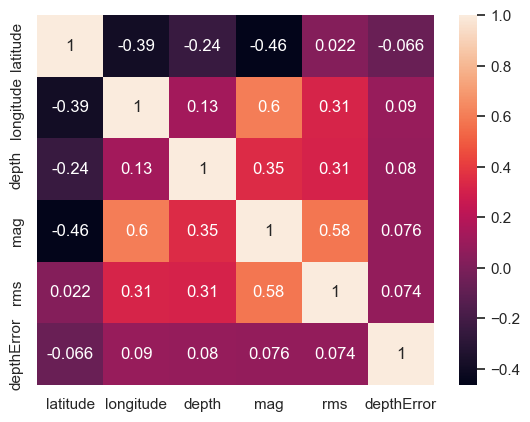

<Figure size 500x500 with 0 Axes>

In [83]:
# heatmap of correlation between data using cleandf dataset
sns.heatmap(cleandf.corr(), annot=True)
plt.figure(figsize=(5,5))
#in future, want to try to train data using clean dataset to predict & 
# then show correlation between predicted & actual using heatmap
plt.show()

In [31]:
#call column updatedDate from dataset
newcleandf1['updatedDate'].value_counts()

2022-10-12    542
2022-09-21    539
2022-09-30    467
2022-09-20    439
2022-09-27    435
2022-10-03    433
2022-10-10    415
2022-10-11    408
2022-10-07    408
2022-09-22    404
2022-10-04    391
2022-09-26    391
2022-09-19    386
2022-10-05    380
2022-10-02    361
2022-09-29    361
2022-09-23    350
2022-10-06    339
2022-09-28    321
2022-10-08    268
2022-09-14    261
2022-10-09    256
2022-09-15    252
2022-09-16    244
2022-09-24    223
2022-09-18    217
2022-10-01    215
2022-09-25    214
2022-09-13    200
2022-09-17    151
2022-10-13     64
Name: updatedDate, dtype: int64

In [33]:
#mapping 10 to Oct, 9 to Sept. Not sure why it's not showing correctly
#have to put as comment for now until get second eye to check

#newcleandf1['month']= newcleandf1['month'].map({'10': 'October', '09': 'September'})
#newcleandf1.head()

In [36]:
# need help to debug because showing this Error 
# ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# plot a scatter mapbox
#fig = px.scatter_mapbox(newcleandf1, 'latitude', 'longitude', 'mag', zoom= 0.5,
 #                       mapbox_style= 'open-street-map', color_continuous_scale= 'Reds', 
  #                      range_color= [4.0, 10.0], animation_frame= 'month')
#fig.show()

In [ ]:
#call column mag from dataset to see magnitudes
newcleandf1['mag'].value_counts()

 1.40    214
 1.60    205
 1.50    201
 1.20    194
 1.30    180
        ... 
 4.06      1
-0.68      1
 3.02      1
-0.56      1
 2.29      1
Name: mag, Length: 565, dtype: int64

<Figure size 1000x500 with 0 Axes>

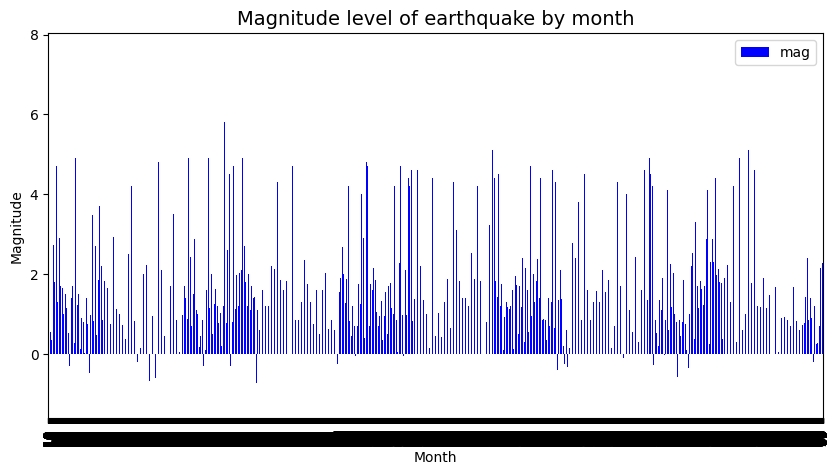

In [43]:
# creating a bar chart to show the Magnitude by Month
#how to show bar chart for just 5 cities most affected??? 
plt.figure(figsize= (10, 5))
newcleandf1.plot.bar(x = "month", y= "mag", color = 'Blue', figsize = (10, 5))
plt.title("Magnitude level of earthquake by month", fontdict = {'fontsize': 14})
plt.ylabel("Magnitude")
plt.xlabel("Month")
plt.show()


In [82]:
#call column month from dataset
newcleandf1['month'].value_counts()

09    5855
10    4480
Name: month, dtype: int64

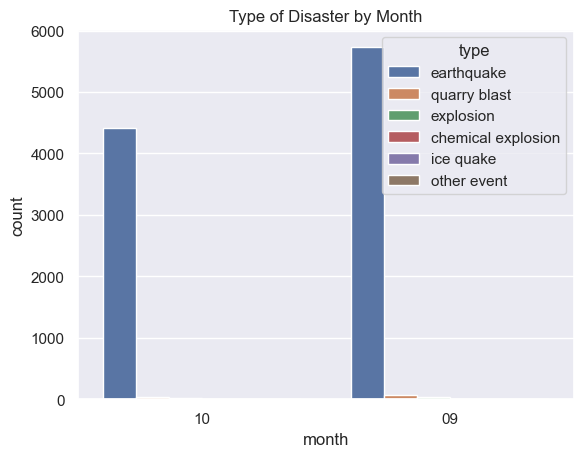

In [81]:
#bar graph showing type of disasters by month
# Conclusion: More disaster occurred in the month of September with 5855 occurrence compared to 
# 4480 occurrence in October.

sns.countplot(x='month', data = newcleandf1, hue = 'type') #hue will automatically show in COLOR
plt.title('Type of Disaster by Month')
plt.show()

In [75]:
#call column type from dataset
newcleandf1['type'].value_counts()

earthquake            10145
quarry blast            113
explosion                72
other event               3
chemical explosion        1
ice quake                 1
Name: type, dtype: int64

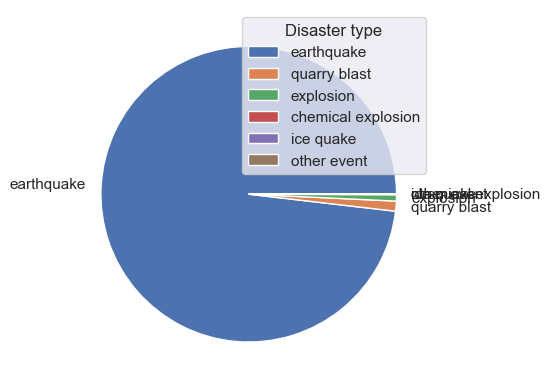

In [73]:
# pie chart showing types of disasters
# Conclusion based on the pie chart shown that the majority of disaster happened in the month of September & October 
# is Earthquake with the count of 10,145 times, followed by Quarry Blast with the count of 113, followed by Explosion
# with the count of 72, followed by other events with the count of 3. The lowest disasters are Chemical Explosion & 
# Ice Quake with the count of once for both. 

disasterType_counts=newcleandf1['type'].value_counts()
disasterType_labels=newcleandf1.type.unique()
pie_dType=plt.pie(disasterType_counts, explode=None, labels = disasterType_labels, )
plt.legend(title='Disaster type') 
plt.show()

Text(0.5, 1.0, 'Magnitude by Depth Error')

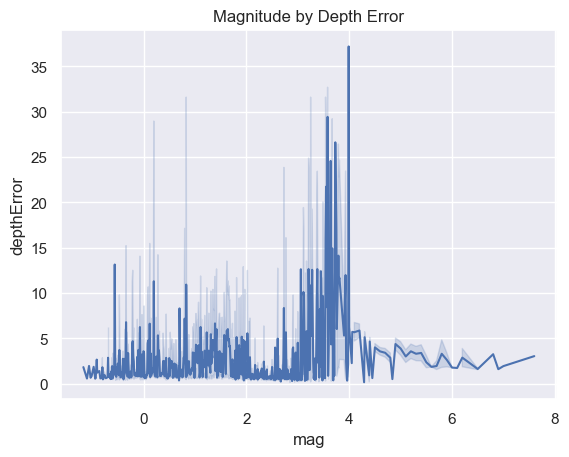

In [78]:
# line chart to show magnitude by depth error
sns.set_theme()
sns.lineplot(y="depthError", x='mag', data=newcleandf1)
plt.title('Magnitude by Depth Error')

# Conclusion: from the graph below, we can conclude that the higher the Magnitude, the worser the Depth Error is.

In [87]:
#call column status from dataset
newcleandf1['status'].value_counts()

reviewed     7756
automatic    2579
Name: status, dtype: int64

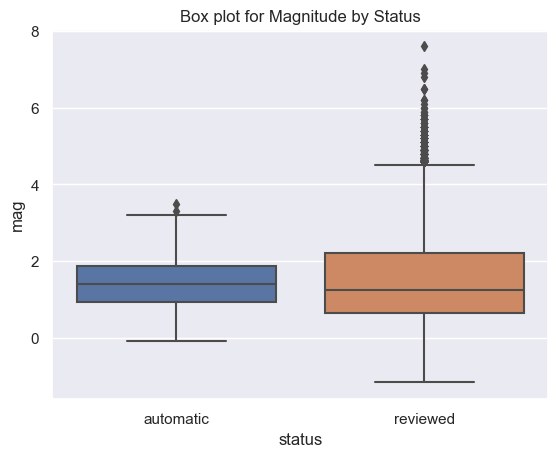

In [86]:
## box plot showing Magnitude by Status
# Conclusion: The reviewed version of Magnitude is higher than the Automatic reading. 
 
sns.boxplot(x='status', y='mag', data=newcleandf1)
plt.title('Box plot for Magnitude by Status')
plt.show()

## trying to show box plot showing magnitude by CHOSEN city only. thinking to use if elis else statements 
# to show only 5 cities mostly effected. need help with this please...
# when have more time, look into removing the floating numbers 

In [95]:
#call column city from dataset
newcleandf1['city'].value_counts()

## trying to show box plot showing magnitude by CHOSEN city only. thinking to use if elis else statements 
# to show only 5 cities mostly effected. need help with this please...
# when have more time, look into removing the floating numbers

 CA                     3070
 Alaska                 1848
 Hawaii                 1054
 Wyoming                 527
 Nevada                  432
                        ... 
 Cuba                      1
 France                    1
 Surigao del Norte         1
 Laikit II (Dimembe)       1
 Romania                   1
Name: city, Length: 96, dtype: int64

In [90]:
#call column type from dataset
newcleandf1['type'].value_counts()

earthquake            10145
quarry blast            113
explosion                72
other event               3
chemical explosion        1
ice quake                 1
Name: type, dtype: int64

<AxesSubplot: title={'center': 'Bar plot showing Magnitude by Type of Disaster'}, xlabel='type', ylabel='mag'>

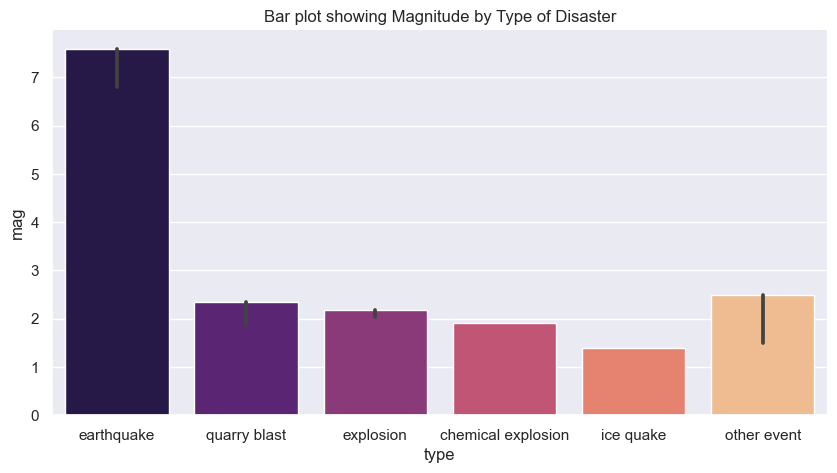

In [91]:
f, ax = plt.subplots(figsize = (10, 5))
sns.despine(f)
plt.title('Bar plot showing Magnitude by Type of Disaster')
sns.barplot(x='type', y='mag', data=newcleandf1, palette='magma', estimator=max)

#Conclusion: Based of the barplot below, we can conclude that Earthquake had the highest magnitude of almost 8, 
#followed by Other Events with magnitude of 2.5, followed by Quarry Blast with magnitude of 2.2, followed by
#Explosion with magnitude just above 2, followed by Chemical Explosion with magnitude just below 2, and lastly
#Ice Quake at magnitude 1.4. 

Text(0.5, 1.0, 'Magnitude and Sensors of Location relationship')

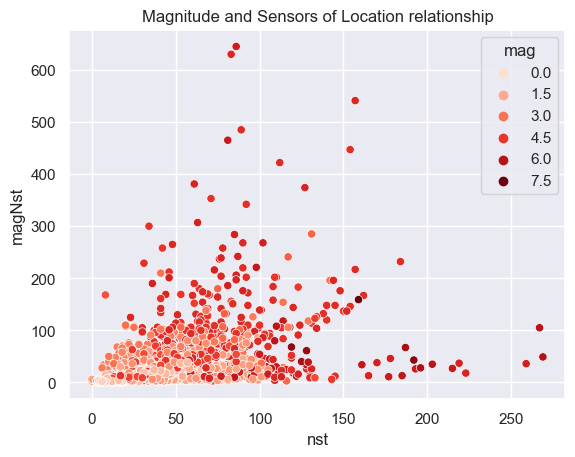

In [94]:
sns.scatterplot(y='magNst', x='nst', hue='mag', data=df, palette='Reds')
plt.title('Magnitude and Sensors of Location relationship')

#Conclusion: Based on this scatter plot, we can conclude that the magnitude has pararrel correlation with the nst.
# This conclusion is based on the lighter red colours mainly are located where nst are smaller. Equivalently, the higher
# the mag (the darker the red colour), we can see them in the higher nst.

# If I have more time, I would look into using plotly on 3D maps. I tried it already but it appears to have error - see below.

<AxesSubplot: >

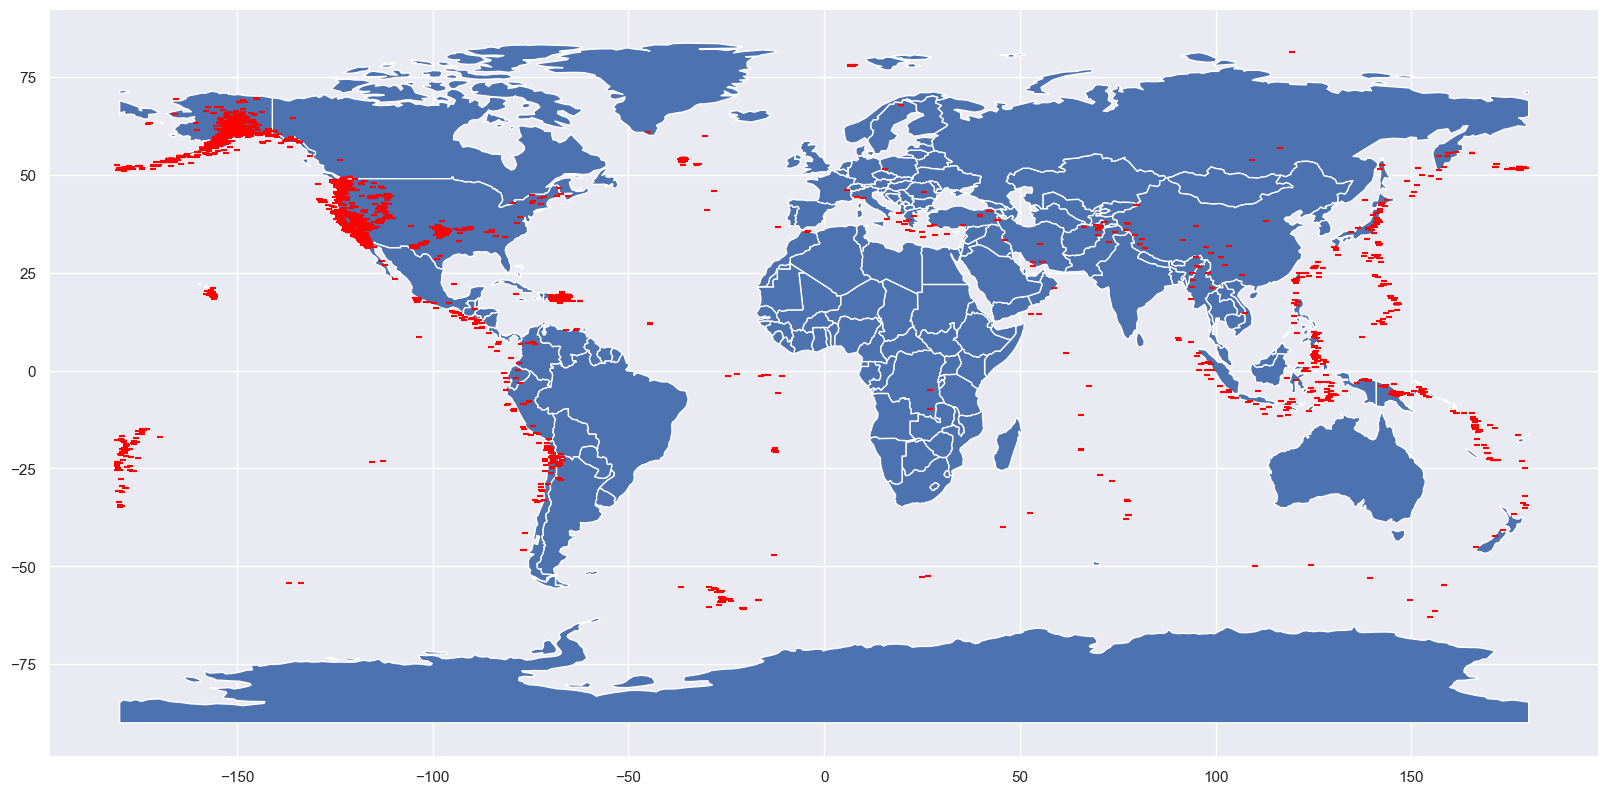

In [103]:
# when I have more time, I will revisit to show magnitude by City on 3D maps. 
# when have more time, look into removing the floating numbers

geometry = [Point(xy) for xy in zip(newcleandf1['longitude'],newcleandf1['latitude'])]
gdf = GeoDataFrame(newcleandf1, geometry=geometry)

world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20,20)), marker=0,color='red',markersize=20)

In [ ]:
#some of the stuff I tried below. Will revisit when have more time

#sns.countplot(x='city', data = newcleandf1, hue = 'type') #hue will automatically show in COLOR
#plt.title('type of disaster by month')
#plt.show()
#tried this but graph looks difficult to make sense. now looking to create pie chart showing type of disasters by month

In [ ]:
# when have more time, look to remove float. potential use DIVMOD or use **pd.to_datetime(df.pop('Date'), format='%m%Y') # convert to datetime & popdeletes the column
# df['Month'],df['Year']=s.dt.year # extract month & year
# print(df) 

# when have more time, also find way to remove the float after second in time column & other float columns
# newcleandf1['newTime'] = newcleandf1['updatedTime'].str.split('.').str.get(0)
# newcleandf1.head()

In [ ]:
#data = newcleandf1.groupby("type")
#data.plot.pie(autopct="%.1f%%", subplots = True)
#colors = sns.color_palette('pastel')
#sns.displot(newcleandf1, x='type')
#plt.pie("type", labels = newcleandf1, colors = colors) 
#type = newcleandf1.loc[newcleandf1["type"]]
#labels = [type]
#plt.pie("mag", labels = labels, colors = colors)
#plt.title('type of disaster by month')
#plt.show()